# Consumer Complaints HY 2023

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('complaints-2023.csv')
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,01/04/23,Credit card or prepaid card,General-purpose credit card or charge card,Problem when making payments,You never received your bill or did not know a...,NaN,None,"Bread Financial Holdings, Inc.",CT,06415,Older American,Consent not provided,Web,01/04/23,Closed with monetary relief,Yes,NaN,6398484
1,04/14/23,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,None,Experian Information Solutions Inc.,CA,94014,None,None,Web,04/14/23,In progress,Yes,NaN,6842543
2,04/13/23,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,None,Experian Information Solutions Inc.,TX,77346,None,None,Web,04/14/23,In progress,Yes,NaN,6835293
3,01/18/23,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,In accordance with the Fair Credit Reporting a...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,78043,None,Consent provided,Web,01/18/23,Closed with explanation,Yes,NaN,6450958
4,05/18/23,Credit card or prepaid card,General-purpose credit card or charge card,Closing your account,Can't close your account,NaN,None,"Avant Holding Company, Inc.",NY,11233,None,None,Web,05/18/23,In progress,Yes,NaN,6995308


## 1. What types of complaint received the most?

In [32]:
complaint_type = df['Product'].value_counts().to_frame().rename(columns={'Product':'count'})
complaint_type

,count
"Credit reporting, credit repair services, or other personal consumer reports",456699
Debt collection,31311
Checking or savings account,24442
Credit card or prepaid card,23104
Mortgage,11825
Vehicle loan or lease,6424
"Money transfer, virtual currency, or money service",6368
"Payday loan, title loan, or personal loan",3085
Student loan,2768


### 1.1 Credit-related complaints by state

In [37]:
credit = df[df['Product']=='Credit reporting, credit repair services, or other personal consumer reports'].groupby('State').agg({'Product':'count'})
credit = credit.rename(columns={'Product':'Count'}).sort_values(by='Count', ascending=False)
credit.head(10)

,Count
State,
FL,57484
TX,53732
CA,42851
GA,39120
PA,26811
NY,26344
IL,22035
NC,18252
NJ,14294


[]

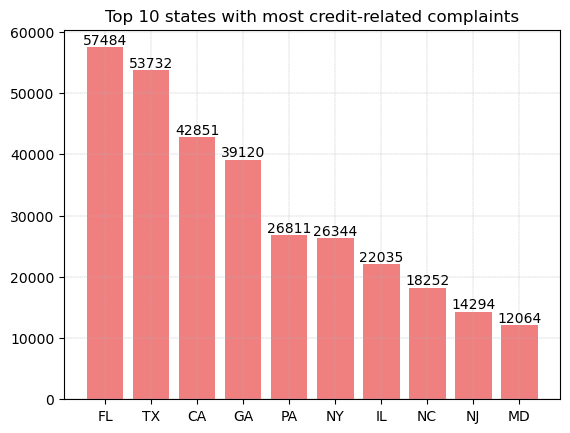

In [109]:
fig, ax = plt.subplots()
bars = plt.bar(credit.index[:10], credit['Count'][:10], color='lightcoral')
for bar in bars:
    height=bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')
ax.grid(True, linestyle='--', linewidth=0.3)
ax.set_title('Top 10 states with most credit-related complaints')
ax.plot()

In [52]:
credit_FL = df[(df['Product']=='Credit reporting, credit repair services, or other personal consumer reports') & (df['State']=='FL')].groupby('Company').agg({'Product':'count'})
credit_FL = credit_FL.rename(columns={'Product':'Count'}).sort_values(by='Count', ascending=False)
credit_FL.head(10)

,Count
Company,
"TRANSUNION INTERMEDIATE HOLDINGS, INC.",18582
"EQUIFAX, INC.",18433
Experian Information Solutions Inc.,16134
CAPITAL ONE FINANCIAL CORPORATION,397
LEXISNEXIS,195
JPMORGAN CHASE & CO.,153
"BANK OF AMERICA, NATIONAL ASSOCIATION",135
"Bread Financial Holdings, Inc.",134
DISCOVER BANK,118


The top 3 companies had significantly higher amount of complants that they received.

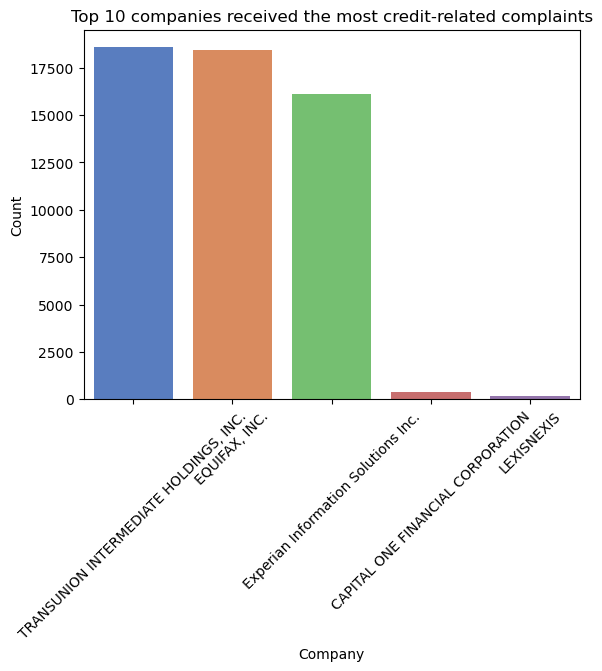

In [114]:
sns.barplot(x=credit_FL.index[:5], y=credit_FL['Count'][:5])
sns.set_palette('muted')
plt.xticks(rotation=45, fontsize=10)
plt.title('Top 10 companies received the most credit-related complaints')
plt.show()

## 2. Complaints trend

In [67]:
df['Date received'] = pd.to_datetime(df['Date received'])
df['month'] = df['Date received'].dt.month

In [94]:
df = df[df['month']!=12]

In [95]:
complaints_by_month = df.groupby('month').agg({'Product':'count'}).rename(columns={'Product':'n_complaints'})
complaints_by_month

,n_complaints
month,
1,93938
2,86536
3,110636
4,98071
5,98568
6,7431


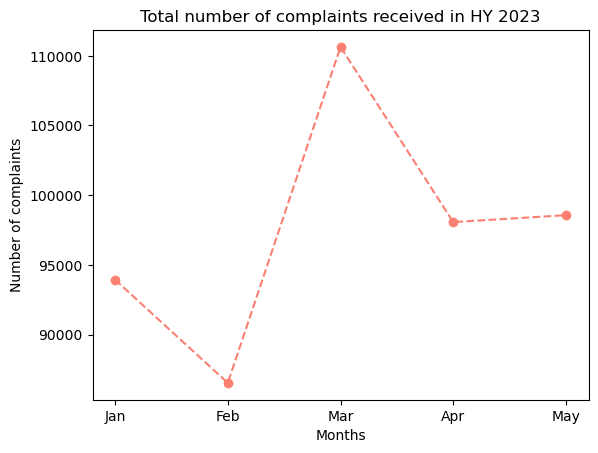

In [103]:
fig, ax = plt.subplots()
ax.plot(complaints_by_month.index[:5], complaints_by_month['n_complaints'][:5], color='salmon', marker='o', linestyle='--')
ax.set_xlabel('Months')
ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May'])
ax.set_ylabel('Number of complaints')
ax.set_title('Total number of complaints received in HY 2023')
plt.show()